In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from Correlation_matrix import CorrMtx
# import seaborn as sns

In [2]:
########## SPECIFY DATAFRAME HERE ################################
channel = 0  # ee=0, emu = 1, mumu=2

# channels = ["ee", "emu", "mumu"]

path = "/depot-new/cms/top/zhou907"

file = path + "/" + "ee_modified_root_2_1.csv"

In [3]:
dataframe = pd.read_csv(file)
dataframe = dataframe.drop(['eventWeight'], axis = 1)

In [4]:
corr = dataframe.corr()

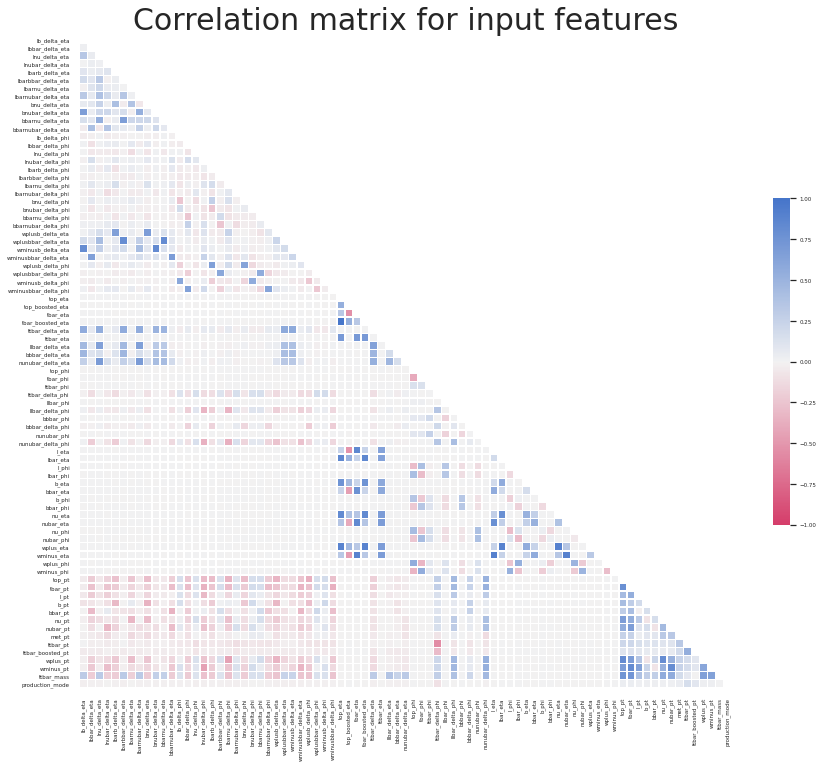

In [5]:
heatmap = CorrMtx(corr, dropDuplicates = True)

# Create list of correlated pairs

In [46]:
################ DEFINE CUT HERE ################################
cut = 0.5

In [47]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [49]:
~mask

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False]])

In [50]:
corr_df = np.abs(corr * (~mask))
corr_df

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass,production_mode
lb_delta_eta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lbbar_delta_eta,0.030943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lnu_delta_eta,0.340966,0.049598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lnubar_delta_eta,0.003232,0.037114,0.020375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lbarb_delta_eta,0.098538,0.036772,0.067719,0.107455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ttbar_boosted_pt,0.041781,0.032300,0.039199,0.014751,0.030697,0.042373,0.016038,0.039092,0.025355,0.035423,...,0.061950,0.052878,0.055217,0.181189,0.543616,0.000000,0.000000,0.000000,0.000000,0.0
wplus_pt,0.022028,0.182038,0.072318,0.125514,0.219793,0.015857,0.284112,0.028108,0.235007,0.030810,...,0.227623,0.812274,0.520368,0.248559,0.169619,0.086448,0.000000,0.000000,0.000000,0.0
wminus_pt,0.017673,0.222274,0.028728,0.283681,0.181703,0.022153,0.122951,0.073715,0.149164,0.079629,...,0.072956,0.520542,0.811906,0.249971,0.167954,0.087471,0.605493,0.000000,0.000000,0.0
ttbar_mass,0.311709,0.198790,0.317738,0.182056,0.197750,0.313205,0.181701,0.317209,0.209483,0.267185,...,0.280251,0.560746,0.558740,0.177166,0.073030,0.003834,0.648592,0.647948,0.000000,0.0


In [51]:
def find_correlation(corr_df, cut=0.5):
    correlated_pairs = []

    num_correlated = np.zeros(len(corr_df))

    col_int = 0
    for col in corr_df:
    #     print(type(col))
        row_int = 0
        for row in corr_df.index:
    #         print(row)
            if corr_df[row][col] > cut:
                correlated_pairs.append((col, row))

                num_correlated[row_int] += 1
                num_correlated[col_int] += 1


            row_int += 1
        col_int += 1


    print(correlated_pairs[0])
    corr_df['number_correlated'] = num_correlated
    return corr_df

In [52]:
corr_df = find_correlation(corr_df)

('bnubar_delta_eta', 'lb_delta_eta')


In [53]:
sorted_df = corr_df.sort_values(by=['number_correlated'], ascending=False)
sorted_df

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass,production_mode,number_correlated
ttbar_eta,0.004828,0.001882,0.001901,0.001245,0.001579,0.003169,0.000007,0.003516,0.001412,0.003819,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,11.0
ttbar_delta_eta,0.566504,0.071404,0.554648,0.010732,0.071908,0.566550,0.008102,0.555905,0.028481,0.500832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,9.0
wminus_pt,0.017673,0.222274,0.028728,0.283681,0.181703,0.022153,0.122951,0.073715,0.149164,0.079629,...,0.520542,0.811906,0.249971,0.167954,0.087471,0.605493,0.000000,0.000000,0.0,8.0
tbar_pt,0.031874,0.264800,0.041403,0.242716,0.206046,0.044526,0.162533,0.059182,0.187733,0.064175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.0
wplus_pt,0.022028,0.182038,0.072318,0.125514,0.219793,0.015857,0.284112,0.028108,0.235007,0.030810,...,0.812274,0.520368,0.248559,0.169619,0.086448,0.000000,0.000000,0.000000,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bbar_phi,0.000062,0.000143,0.000810,0.000900,0.000043,0.000499,0.000616,0.001073,0.000171,0.000389,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
b_phi,0.000107,0.002102,0.000287,0.000777,0.000086,0.000243,0.000391,0.000512,0.000471,0.000291,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
bbbar_delta_phi,0.020868,0.009026,0.018972,0.041626,0.011264,0.019893,0.040732,0.018015,0.043983,0.002802,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
nunubar_phi,0.001354,0.001353,0.000342,0.001909,0.000301,0.000518,0.001943,0.001392,0.001250,0.002149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [56]:
stuff_to_drop = sorted_df.index[list(range(0,9))]
thinned_df = sorted_df.drop(stuff_to_drop, axis=0)
thinned_df = thinned_df.drop(stuff_to_drop, axis=1)
thinned_df

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,b_pt,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,ttbar_mass,production_mode,number_correlated
wplus_eta,0.000593,0.001756,0.000333,0.000171,0.004020,0.004327,0.000020,0.001543,0.002367,0.001250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.0
tbar_eta,0.005091,0.002800,0.001085,0.001914,0.000255,0.002086,0.001174,0.001393,0.000775,0.004008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.0
ttbar_mass,0.311709,0.198790,0.317738,0.182056,0.197750,0.313205,0.181701,0.317209,0.209483,0.267185,...,0.281874,0.280251,0.560746,0.558740,0.177166,0.073030,0.003834,0.000000,0.0,6.0
l_eta,0.006688,0.003290,0.002303,0.001401,0.000183,0.000180,0.000768,0.002993,0.000992,0.004527,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.0
b_eta,0.000149,0.000106,0.000971,0.000529,0.002025,0.004453,0.000401,0.001287,0.002234,0.000544,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bbar_phi,0.000062,0.000143,0.000810,0.000900,0.000043,0.000499,0.000616,0.001073,0.000171,0.000389,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
b_phi,0.000107,0.002102,0.000287,0.000777,0.000086,0.000243,0.000391,0.000512,0.000471,0.000291,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
bbbar_delta_phi,0.020868,0.009026,0.018972,0.041626,0.011264,0.019893,0.040732,0.018015,0.043983,0.002802,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
nunubar_phi,0.001354,0.001353,0.000342,0.001909,0.000301,0.000518,0.001943,0.001392,0.001250,0.002149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [57]:
thinned_df = thinned_df.drop('number_correlated', axis=1)

In [59]:
thinned_df

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,b_pt,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,ttbar_mass,production_mode,number_correlated
lb_delta_eta,1.000000,0.078697,0.618880,0.215965,0.125870,0.551910,0.018890,0.733817,0.099889,0.730419,...,0.053558,0.078604,0.074480,0.124972,0.025449,-0.007398,-0.032058,-0.040280,NaN,12.0
lbbar_delta_eta,0.078697,1.000000,0.122499,0.444167,0.261148,0.136858,0.336731,0.234705,0.246759,0.241705,...,0.244772,0.156791,0.120347,0.107368,0.014692,-0.031834,-0.053444,-0.060444,NaN,4.0
lnu_delta_eta,0.618880,0.122499,1.000000,0.226363,0.226676,0.779288,0.348373,0.776417,0.268067,0.565215,...,0.076019,0.118146,0.089587,0.144740,0.030530,-0.017636,-0.044197,-0.052555,NaN,16.0
lnubar_delta_eta,0.215965,0.444167,0.226363,1.000000,0.308037,0.107469,0.279318,0.363622,0.274716,0.218321,...,0.382433,0.305392,0.476460,0.256900,0.062515,-0.043483,-0.066406,-0.076165,NaN,2.0
lbarb_delta_eta,0.125870,0.261148,0.226676,0.308037,1.000000,0.095582,0.453372,0.129097,0.797186,0.180305,...,0.162796,0.153296,0.172362,0.116330,0.024140,-0.025259,-0.048076,-0.055362,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
met_pt,0.025449,0.014692,0.030530,0.062515,0.024140,0.040522,0.085866,0.052664,0.045271,0.053686,...,0.580153,0.638017,0.409091,0.509383,1.000000,0.486390,0.107167,0.088909,NaN,12.0
ttbar_pt,-0.007398,-0.031834,-0.017636,-0.043483,-0.025259,0.003480,-0.029704,-0.001557,-0.024251,0.005700,...,0.218268,0.246183,0.127756,0.169418,0.486390,1.000000,0.267291,0.262487,NaN,2.0
ttbar_boosted_pt,-0.032058,-0.053444,-0.044197,-0.066406,-0.048076,-0.024760,-0.057065,-0.032842,-0.040183,-0.023818,...,0.065370,0.081962,0.024865,0.039443,0.107167,0.267291,1.000000,0.999033,NaN,4.0
ttbar_mass,-0.040280,-0.060444,-0.052555,-0.076165,-0.055362,-0.033512,-0.067670,-0.042192,-0.048072,-0.032958,...,0.034480,0.048851,-0.005836,0.002314,0.088909,0.262487,0.999033,1.000000,NaN,4.0


In [58]:
thinned_df = find_correlation(thinned_df.corr())
sorted2_df = corr_df.sort_values(by=['number_correlated'], ascending=False)
sorted2_df

('lb_delta_eta', 'lb_delta_eta')


,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass,production_mode,number_correlated
ttbar_eta,0.004828,0.001882,0.001901,0.001245,0.001579,0.003169,0.000007,0.003516,0.001412,0.003819,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,11.0
ttbar_delta_eta,0.566504,0.071404,0.554648,0.010732,0.071908,0.566550,0.008102,0.555905,0.028481,0.500832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,9.0
wminus_pt,0.017673,0.222274,0.028728,0.283681,0.181703,0.022153,0.122951,0.073715,0.149164,0.079629,...,0.520542,0.811906,0.249971,0.167954,0.087471,0.605493,0.000000,0.000000,0.0,8.0
tbar_pt,0.031874,0.264800,0.041403,0.242716,0.206046,0.044526,0.162533,0.059182,0.187733,0.064175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.0
wplus_pt,0.022028,0.182038,0.072318,0.125514,0.219793,0.015857,0.284112,0.028108,0.235007,0.030810,...,0.812274,0.520368,0.248559,0.169619,0.086448,0.000000,0.000000,0.000000,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bbar_phi,0.000062,0.000143,0.000810,0.000900,0.000043,0.000499,0.000616,0.001073,0.000171,0.000389,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
b_phi,0.000107,0.002102,0.000287,0.000777,0.000086,0.000243,0.000391,0.000512,0.000471,0.000291,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
bbbar_delta_phi,0.020868,0.009026,0.018972,0.041626,0.011264,0.019893,0.040732,0.018015,0.043983,0.002802,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
nunubar_phi,0.001354,0.001353,0.000342,0.001909,0.000301,0.000518,0.001943,0.001392,0.001250,0.002149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
